In [607]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import graphviz 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import cross_val_score

In [580]:
#load dataset
data_train=pd.read_csv("index.csv")
data_test=pd.read_csv("index (1).csv")
Y_train=data_train["Creditability"]
X_train=data_train.iloc[:,2:22]
Y_test=data_test["Creditability"]
X_test=data_test.iloc[:,2:22]
Y1=np.asarray(Y_train)
X1=np.asarray(X_train)
Y2=np.asarray(Y_test)
X2=np.asarray(X_test)
d_train=pd.read_csv("German credit.csv")
y_train=d_train["Creditability"]
x_train=d_train.iloc[:,1:22]

Accuracy score without hyperparameter tuning(DECISION TREE):
Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.686


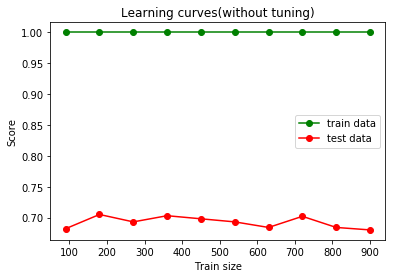

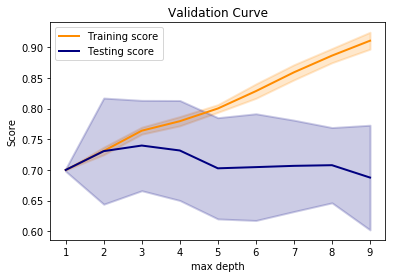

In [581]:
# Accuracy score without hyperparameter tuning(DECISION TREE)
print("Accuracy score without hyperparameter tuning(DECISION TREE):")
model=DecisionTreeClassifier()
model.fit(X1,Y1)
print('Accuracy Score on train data: ',model.score(X1,Y1))
print('Accuracy Score on test data: ',model.score(X2,Y2))

#learning curve without hyperparameter tuning(DECISION TREE)
train_sizes, train_scores_svr, test_scores_svr = learning_curve(model, x_train, y_train, train_sizes=np.linspace(0.1, 1, 10),scoring="accuracy", cv=10)
plt.plot(train_sizes, train_scores_svr.mean(1), 'o-', color="g",label="train data")
plt.plot(train_sizes, test_scores_svr.mean(1), 'o-', color="r", label="test data")
plt.xlabel("Train size")
plt.ylabel("Score")
plt.title('Learning curves(without tuning)')
plt.legend(loc="best")
plt.show()

#validation curve without hyperparameter tuning(DECISION TREE)
param_range = np.arange(1,10,1)
train_scores, test_scores = validation_curve(model,x_train,y_train,param_name="max_depth", param_range=param_range,cv=15,  n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve")
plt.xlabel("max depth")
plt.ylabel("Score")
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Testing score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

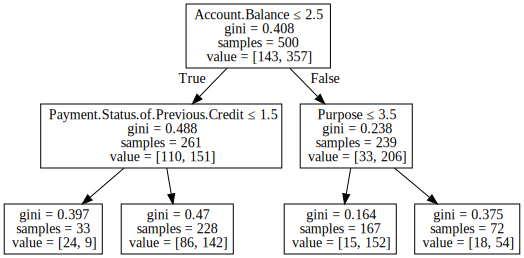

In [582]:
#sample decision tree of depth 2
clf = DecisionTreeClassifier(criterion='gini',max_depth=2, max_features=10, min_samples_leaf=2, min_samples_split=2, splitter='best', presort=True)
clf = clf.fit(X1,Y1)
dot_data = tree.export_graphviz(clf,feature_names=X_train.columns,filled=False, rounded=False,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

Effect on accuracy while increasing the depth


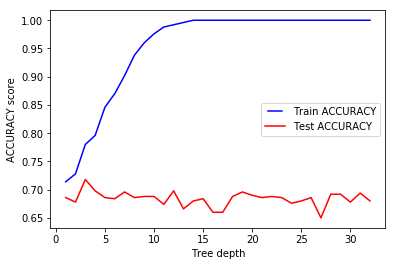

Effect on accuracy while increasing the number of samples required for splitting


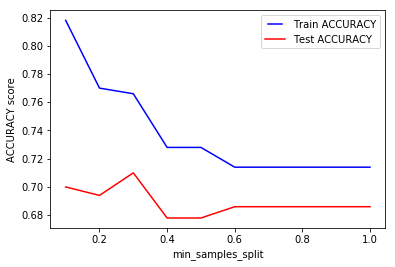

Effect on accuracy while increasing the number of samples required at leaf


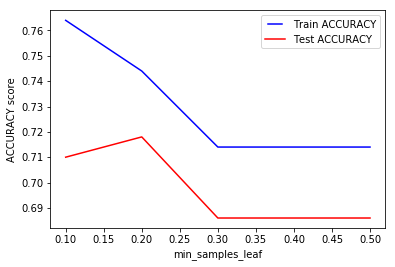

Effect on accuracy while increasing the number of features required to split


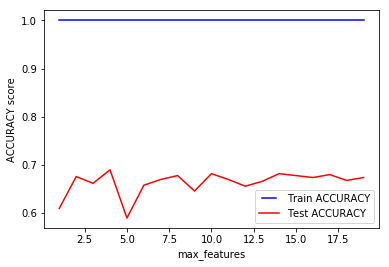

In [603]:
#hyperparameter tuning(justification)

#1. max depth
print("Effect on accuracy while increasing the depth")
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X1, Y1)
    auc=dt.score(X1,Y1)
    train_results.append(auc)
    auc=dt.score(X2,Y2)
    test_results.append(auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label="Train ACCURACY")
line2, = plt.plot(max_depths, test_results, "r", label="Test ACCURACY")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("ACCURACY score")
plt.xlabel("Tree depth")
plt.show()

# 2. min samples split
print("Effect on accuracy while increasing the number of samples required for splitting")
max_depths = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(min_samples_split=max_depth)
    dt.fit(X1, Y1)
    auc=dt.score(X1,Y1)
    train_results.append(auc)
    auc=dt.score(X2,Y2)
    test_results.append(auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label="Train ACCURACY")
line2, = plt.plot(max_depths, test_results, "r", label="Test ACCURACY")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("ACCURACY score")
plt.xlabel("min_samples_split")
plt.show()

# 3. min samples leaf
print("Effect on accuracy while increasing the number of samples required at leaf")
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(X1,Y1)
    auc=dt.score(X1,Y1)
    train_results.append(auc)
    auc=dt.score(X2,Y2)
    test_results.append(auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, "b", label="Train ACCURACY")
line2, = plt.plot(min_samples_leafs, test_results, "r", label="Test ACCURACY")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("ACCURACY score")
plt.xlabel("min_samples_leaf")
plt.show()

# 4. max features
print("Effect on accuracy while increasing the number of features required to split")
max_features = list(range(1,X1.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features=max_feature)
    dt.fit(X1, Y1)
    auc=dt.score(X1,Y1)
    train_results.append(auc)
    auc=dt.score(X2,Y2)
    test_results.append(auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, "b", label="Train ACCURACY")
line2, = plt.plot(max_features, test_results, "r", label="Test ACCURACY")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("ACCURACY score")
plt.xlabel("max_features")
plt.show()

In [606]:
#parameter tuning using grid search cv
parameters={'criterion':('gini','entropy'),'splitter':('best','random'),'min_samples_split' : np.linspace(0.1, 1.0, 10, endpoint=True),'max_depth':np.linspace(1, 10, 10, endpoint=True),'min_samples_leaf':np.linspace(0.1, 0.5, 5, endpoint=True),'max_features':list(range(1,X1.shape[1]))}
clf_tree=DecisionTreeClassifier()
clf=GridSearchCV(clf_tree,parameters,cv=5)
clf.fit(X1,Y1)
clf.best_params_

/Users/nikitamehrotra/Downloads/assignment1/env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'entropy',
 'max_depth': 4.0,
 'max_features': 18,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.30000000000000004,
 'splitter': 'random'}

Accuracy Score with Hyperparameter tuning(DECISION TREE):
Accuracy Score on train data:  0.714
Accuracy Score on test data:  0.686


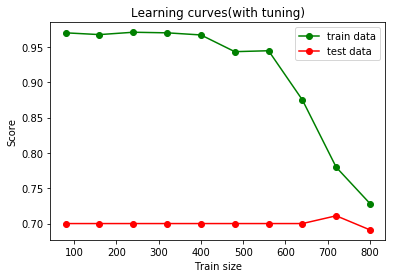

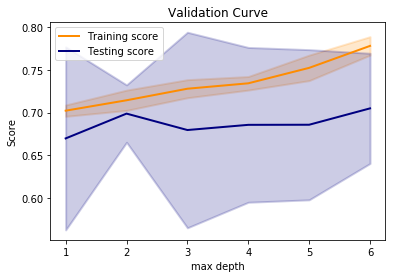

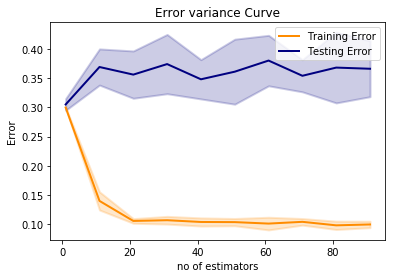

varaince error 0.027999999999999987


In [610]:
#fiiting the model
model_tuned = DecisionTreeClassifier(criterion='entropy',max_depth=4, max_features=18, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, splitter='random', presort=True)
model_tuned  = model_tuned.fit (X1,Y1)


# Accuracy Score with Hyperparameter tuning(DECISION TREE)
print("Accuracy Score with Hyperparameter tuning(DECISION TREE):")
print('Accuracy Score on train data: ',model_tuned .score(X1,Y1))
print('Accuracy Score on test data: ',model_tuned .score(X2,Y2))


#learning curve with hyperparameter tuning(DECISION TREE)
train_sizes, train_scores_svr, test_scores_svr = learning_curve(model_tuned , x_train, y_train, train_sizes=np.linspace(0.1, 1, 10),
                   scoring="accuracy", cv=5)
plt.plot(train_sizes, train_scores_svr.mean(1), 'o-', color="g",label="train data")
plt.plot(train_sizes, test_scores_svr.mean(1), 'o-', color="r", label="test data")
plt.xlabel("Train size")
plt.ylabel("Score")
plt.title('Learning curves(with tuning)')
plt.legend(loc="best")
plt.show()

#validation curve with Hyperparameter tuning(DECISION TREE)
param_range = np.arange(1,7,1)
model_tuned1 = DecisionTreeClassifier(criterion='gini', max_features=8, min_samples_leaf=2, min_samples_split=2, splitter='random', presort=True)
train_scores, test_scores = validation_curve(model_tuned1,x_train,y_train,param_name="max_depth", param_range=param_range,cv=15, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.title("Validation Curve")
plt.xlabel("max depth")
plt.ylabel("Score")
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Testing score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

#error varaince on test and training data
param_range = np.arange(1,100,10)
train_scores, test_scores = validation_curve(model_tuned1,x_train,y_train,param_name="max_depth", param_range=param_range,cv=5, scoring="accuracy", n_jobs=1)
e_train=np.ones((train_scores.shape[0],train_scores.shape[1]))
e_test=np.ones((test_scores.shape[0],test_scores.shape[1]))
errors_test=e_test-test_scores
erros_train=e_train-train_scores
train_scores_mean = np.mean(erros_train, axis=1)
train_scores_std = np.std(erros_train, axis=1)
test_scores_mean = np.mean(errors_test, axis=1)
test_scores_std = np.std(errors_test, axis=1)
plt.title("Error variance Curve")
plt.xlabel("no of estimators")
plt.ylabel("Error")
lw = 2
plt.plot(param_range, train_scores_mean, label="Training Error",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Testing Error",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

# error varaince
val=cross_val_score(model_tuned, x_train, y_train, cv=5) 
error=1-val
print("varaince error",np.std(error))

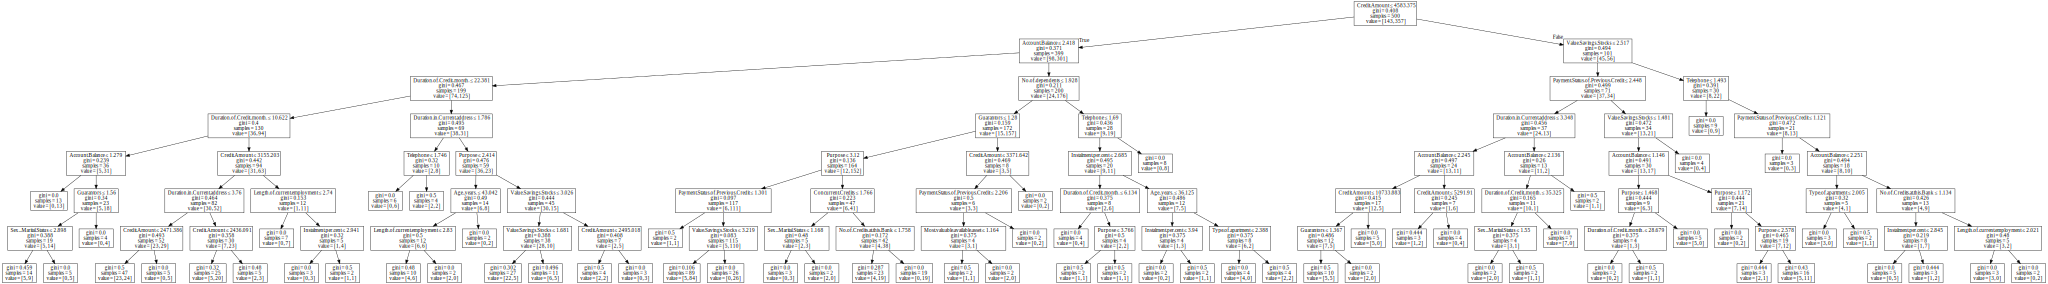

In [587]:
#plotting the generated decision tree
dot_data = tree.export_graphviz(model_tuned,feature_names=X_train.columns,filled=False, rounded=False,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

Accuracy Score without Hyperparameter tuning(Random forests):
Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.732


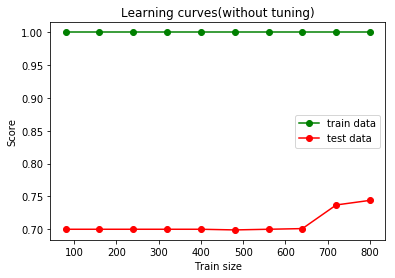

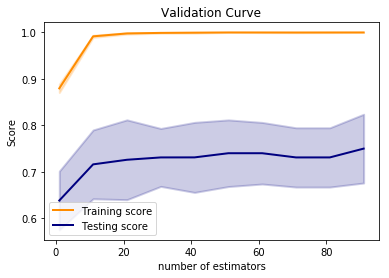

In [611]:
#Accuracy Score without Hyperparameter tuning(Random forests)
clf_tree = RandomForestClassifier(n_estimators=100)
clf_tree.fit(X1,Y1)
print("Accuracy Score without Hyperparameter tuning(Random forests):")
print('Accuracy Score on train data: ',clf_tree.score(X1,Y1))
print('Accuracy Score on test data: ',clf_tree.score(X2,Y2))

#learning curve without hyperparameter tuning(Random forests)
train_sizes, train_scores_svr, test_scores_svr = learning_curve(clf_tree, x_train, y_train, train_sizes=np.linspace(0.1, 1, 10),
                   scoring="accuracy", cv=5)
plt.plot(train_sizes, train_scores_svr.mean(1), 'o-', color="g",
         label="train data")
plt.plot(train_sizes, test_scores_svr.mean(1), 'o-', color="r",
         label="test data")
plt.xlabel("Train size")
plt.ylabel("Score")
plt.title('Learning curves(without tuning)')
plt.legend(loc="best")

plt.show()

#validation curve without hyperparameter tuning(Random forests)
param_range = np.arange(1,100,10)
train_scores, test_scores = validation_curve(clf_tree,x_train,y_train,param_name="n_estimators", param_range=param_range,cv=15, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve")
plt.xlabel("number of estimators")
plt.ylabel("Score")
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Testing score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Effect on accuracy while increasing the number of estimators


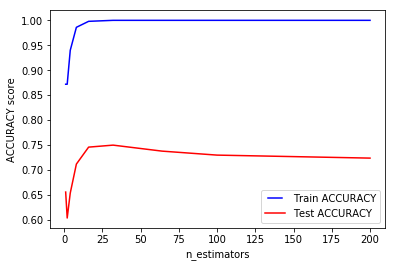

Effect on accuracy while increasing maximum depth


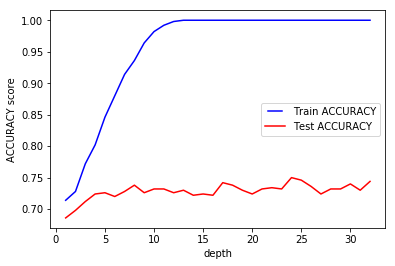

Effect on accuracy while increasing the number of samples required at leaf


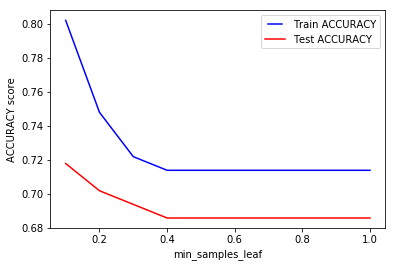

Effect on accuracy while increasing the number of features required to split


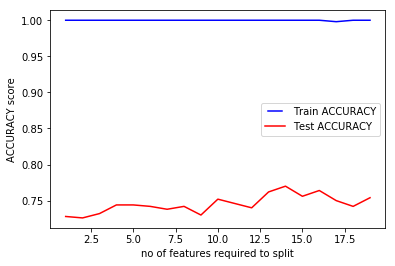

Effect on accuracy while increasing the samples at leaf


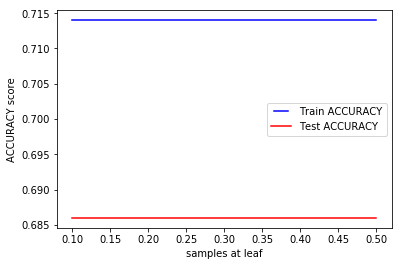

In [615]:
#hyperparameter tuning(justification)

#1. N_estimators
print("Effect on accuracy while increasing the number of estimators")
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X1,Y1)
    auc=rf.score(X1,Y1)
    train_results.append(auc)
    auc=rf.score(X2,Y2)
    test_results.append(auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label="Train ACCURACY")
line2, = plt.plot(n_estimators, test_results, "r", label="Test ACCURACY")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("ACCURACY score")
plt.xlabel("n_estimators")
plt.show()

# 2. max_depth
print("Effect on accuracy while increasing maximum depth")
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt= RandomForestClassifier(n_estimators=100,max_depth=max_depth, n_jobs=-1)
    dt.fit(X1, Y1)
    auc=dt.score(X1,Y1)
    train_results.append(auc)
    auc=dt.score(X2,Y2)
    test_results.append(auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label="Train ACCURACY")
line2, = plt.plot(max_depths, test_results, "r", label="Test ACCURACY")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("ACCURACY score")
plt.xlabel("depth")
plt.show()

# 3. min_samples_split
print("Effect on accuracy while increasing the number of samples required at leaf")
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = RandomForestClassifier(n_estimators=100,min_samples_split=min_samples_split)
    dt.fit(X1,Y1)
    auc=dt.score(X1,Y1)
    train_results.append(auc)
    auc=dt.score(X2,Y2)
    test_results.append(auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, "b", label="Train ACCURACY")
line2, = plt.plot(min_samples_splits, test_results, "r", label="Test ACCURACY")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("ACCURACY score")
plt.xlabel("min_samples_leaf")
plt.show()

# 4. max_features
print("Effect on accuracy while increasing the number of features required to split")
max_features = list(range(1,X1.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt= RandomForestClassifier(n_estimators=100,max_features=max_feature)
    dt.fit(X1, Y1)
    auc=dt.score(X1,Y1)
    train_results.append(auc)
    auc=dt.score(X2,Y2)
    test_results.append(auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, "b", label="Train ACCURACY")
line2, = plt.plot(max_features, test_results, "r", label="Test ACCURACY")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("ACCURACY score")
plt.xlabel("no of features required to split")
plt.show()

# 5. min_samples_leaf
print("Effect on accuracy while increasing the samples at leaf")
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = RandomForestClassifier(n_estimators=100,min_samples_leaf=min_samples_leaf)
    dt.fit(X1, Y1)
    auc=dt.score(X1,Y1)
    train_results.append(auc)
    auc=dt.score(X2,Y2)
    test_results.append(auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, "b", label="Train ACCURACY")
line2, = plt.plot(min_samples_leafs, test_results, "r", label="Test ACCURACY")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("ACCURACY score")
plt.xlabel("samples at leaf")
plt.show()

In [617]:
#tuning hyperparameters
clf=RandomForestClassifier(n_estimators=30)
param_dist = {"max_depth": np.linspace(1, 32, 32, endpoint=True),
              "max_features": list(range(1,x_train.shape[1])),
              "min_samples_split":np.linspace(0.1, 1.0, 10, endpoint=True),
              "min_samples_leaf":np.linspace(0.1, 0.5, 5, endpoint=True),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,n_iter=n_iter_search, cv=5)
random_search.fit(X1,Y1)
random_search.best_params_

{'min_samples_split': 0.1,
 'min_samples_leaf': 0.1,
 'max_features': 7,
 'max_depth': 32.0,
 'criterion': 'gini',
 'bootstrap': True}

Accuracy Score with Hyperparameter tuning(RANDOM FOREST):
Accuracy Score on train data:  0.726
Accuracy Score on test data:  0.688


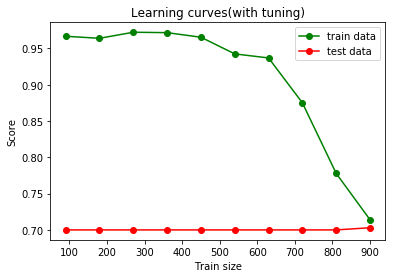

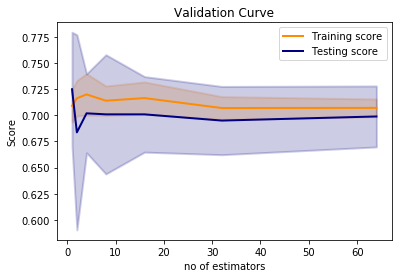

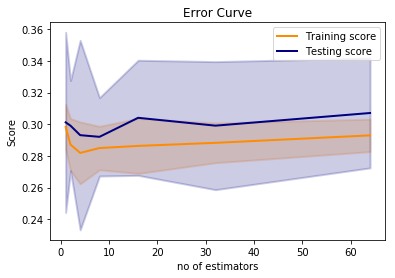

varaince error 0.01140175425099136


In [620]:
#fitting the tuned model
clf_tunedtree=RandomForestClassifier(n_estimators=30,bootstrap=True,criterion="gini",min_samples_split=0.1,max_depth=32,max_features=7,min_samples_leaf=0.1)
clf_tunedtree.fit(X1,Y1)
print("Accuracy Score with Hyperparameter tuning(RANDOM FOREST):")
print('Accuracy Score on train data: ',clf_tunedtree.score(X1,Y1))
print('Accuracy Score on test data: ',clf_tunedtree.score(X2,Y2))

#learning curve with hyperparameter tuning(Random forests)
train_sizes, train_scores_svr, test_scores_svr = learning_curve(clf_tunedtree, x_train, y_train, train_sizes=np.linspace(0.1, 1, 10),
                   scoring="accuracy", cv=10)
plt.plot(train_sizes, train_scores_svr.mean(1), 'o-', color="g",
         label="train data")
plt.plot(train_sizes, test_scores_svr.mean(1), 'o-', color="r",
         label="test data")
plt.xlabel("Train size")
plt.ylabel("Score")
plt.title('Learning curves(with tuning)')
plt.legend(loc="best")
plt.show()

#validation curve with hyperparameter tuning(DECISION TREE)
clf_tunedtree1=RandomForestClassifier(bootstrap=True,criterion="entropy",max_depth=40,max_features=9,min_samples_split=0.3,min_samples_leaf=0.1)
param_range =  [1, 2, 4, 8, 16, 32, 64]
train_scores, test_scores = validation_curve(clf_tunedtree1,x_train,y_train,param_name="n_estimators", param_range=param_range,cv=15, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve")
plt.xlabel("no of estimators")
plt.ylabel("Score")
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Testing score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

#validation curve with hyperparameter tuning(DECISION TREE)
train_scores, test_scores = validation_curve(clf_tunedtree1,x_train,y_train,param_name="n_estimators", param_range=param_range,cv=15, n_jobs=1)
e_train=np.ones((train_scores.shape[0],train_scores.shape[1]))
e_test=np.ones((test_scores.shape[0],test_scores.shape[1]))
errors_test=e_test-test_scores
erros_train=e_train-train_scores
train_scores_mean = np.mean(erros_train, axis=1)
train_scores_std = np.std(erros_train, axis=1)
test_scores_mean = np.mean(errors_test, axis=1)
test_scores_std = np.std(errors_test, axis=1)

plt.title("Error Curve")
plt.xlabel("no of estimators")
plt.ylabel("Score")
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Testing score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

#error variance
val=cross_val_score(clf_tunedtree, x_train, y_train, cv=5) 
error=1-val
print("varaince error",np.std(error))

In [622]:
from sklearn.externals import joblib
filename1='RandomForest.sav'
filename='DecisionTrees.sav'
joblib.dump(model_tuned,filename)
joblib.dump(clf_tunedtree,filename1)

['RandomForest.sav']